<h2>Random Forest</h2>

In [1]:
# load data
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from math import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

data = np.loadtxt('data_2.csv', delimiter = ',')
np.random.shuffle(data)

X = np.delete(data, 6, axis = 1) # pred[i][j]
y = np.delete(data, [0, 1, 2, 3, 4, 5], axis = 1) # klase[i][0] - classes 0 and 1

def column(matrix, p):
    return np.array([row[p] for row in matrix])

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% (499) training and 30% (215) test

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 20)] # 10, 150, 20

max_features = ['sqrt', 'log2', 2, 3, 4, 5, 6] # sqrt, log2, 2, 3, 4, 5, 6

max_depth = [int(x) for x in np.linspace(3, 50, num = 20)] # 5, 50, 20
max_depth.append(None)

param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth}

In [3]:
rf = RandomForestClassifier()

rf_random = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

rf_random.fit(X_train, y_train.ravel())

rf_random.best_params_

Fitting 5 folds for each of 2940 candidates, totalling 14700 fits


{'max_depth': 3, 'max_features': 2, 'n_estimators': 39}

In [4]:
optimal_max_depth = 7             # 5 optimal, 5
optimal_max_features = 2          # 2 optimal, 2
optimal_n_estimators = 61         # 24 optimal, 113

clf = RandomForestClassifier(max_depth = optimal_max_depth, max_features = optimal_max_features, n_estimators = optimal_n_estimators)

clf.fit(X_train, y_train.ravel())

y_pred = clf.predict(X_test)

print("Tacnost:", metrics.accuracy_score(y_test, y_pred) * 100) # 0.8558139534883721 is the best possible accuracy

Tacnost: 79.53488372093022


Tacnost za dubinu 3 je: 77.67441860465117
Tacnost za dubinu 5 je: 80.0
Tacnost za dubinu 7 je: 81.86046511627907
Tacnost za dubinu 10 je: 81.86046511627907
Tacnost za dubinu 12 je: 79.53488372093022
Tacnost za dubinu 15 je: 80.0
Tacnost za dubinu 17 je: 79.06976744186046
Tacnost za dubinu 20 je: 79.06976744186046
Tacnost za dubinu 22 je: 79.53488372093022
Tacnost za dubinu 25 je: 79.53488372093022
Tacnost za dubinu 27 je: 78.6046511627907
Tacnost za dubinu 30 je: 78.6046511627907
Tacnost za dubinu 32 je: 79.53488372093022
Tacnost za dubinu 35 je: 78.6046511627907
Tacnost za dubinu 37 je: 79.53488372093022
Tacnost za dubinu 40 je: 79.53488372093022
Tacnost za dubinu 42 je: 79.53488372093022
Tacnost za dubinu 45 je: 78.13953488372093
Tacnost za dubinu 47 je: 78.13953488372093
Tacnost za dubinu 50 je: 78.6046511627907


([<matplotlib.axis.XTick at 0x1fa04e5bd30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

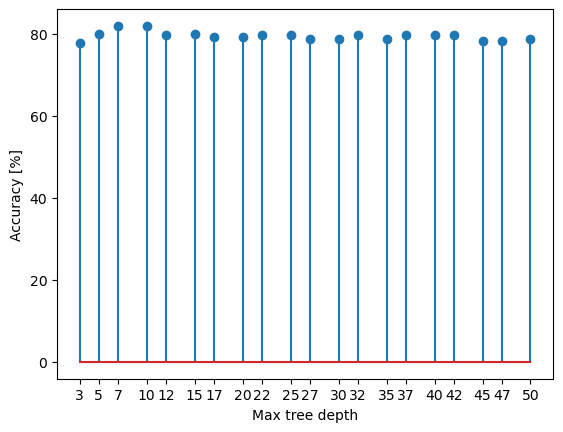

In [5]:
optimal_max_depth_pt2 = np.linspace(3, 50, 20, dtype = int)
y_osa = []
x_osa = optimal_max_depth_pt2

for i in range(0, len(optimal_max_depth_pt2)):
    clf = RandomForestClassifier(max_depth = optimal_max_depth_pt2[i], max_features = optimal_max_features, n_estimators = optimal_n_estimators)

    clf.fit(X_train, y_train.ravel())

    y_pred = clf.predict(X_test)

    print("Tacnost za dubinu", optimal_max_depth_pt2[i], "je:", metrics.accuracy_score(y_test, y_pred) * 100)
    y_osa.append(metrics.accuracy_score(y_test, y_pred) * 100)
    
fig = plt.figure()
ax = fig.add_subplot()
y = y_osa
xt = x_osa
ax.stem(xt, y)
plt.xlabel('Max tree depth')
plt.ylabel('Accuracy [%]')
plt.xticks(x_osa)

Tacnost za maksimalan broj odlika koje se razmatraju 2 je: 82.7906976744186
Tacnost za maksimalan broj odlika koje se razmatraju 3 je: 81.86046511627907
Tacnost za maksimalan broj odlika koje se razmatraju 4 je: 81.3953488372093
Tacnost za maksimalan broj odlika koje se razmatraju 5 je: 80.46511627906978
Tacnost za maksimalan broj odlika koje se razmatraju 6 je: 80.93023255813954


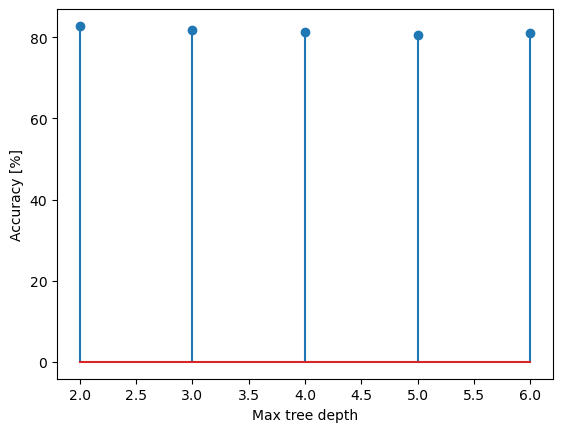

In [6]:
optimal_max_features_pt2 = [2, 3, 4, 5, 6]
yy_osa = []
xx_osa = optimal_max_features_pt2

for i in range(0, len(optimal_max_features_pt2)):
    clf = RandomForestClassifier(max_depth = optimal_max_depth, max_features = optimal_max_features_pt2[i], n_estimators = optimal_n_estimators)

    clf.fit(X_train, y_train.ravel())

    y_pred = clf.predict(X_test)

    print("Tacnost za maksimalan broj odlika koje se razmatraju", optimal_max_features_pt2[i], "je:", metrics.accuracy_score(y_test, y_pred) * 100)
    yy_osa.append(metrics.accuracy_score(y_test, y_pred) * 100)
    
plt.stem(xx_osa, yy_osa)
plt.xlabel('Max tree depth')
plt.ylabel('Accuracy [%]')
plt.show()

Tacnost za broj estimatora 10 je: 80.93023255813954
Tacnost za broj estimatora 17 je: 80.46511627906978
Tacnost za broj estimatora 24 je: 80.0
Tacnost za broj estimatora 32 je: 80.93023255813954
Tacnost za broj estimatora 39 je: 80.93023255813954
Tacnost za broj estimatora 46 je: 81.3953488372093
Tacnost za broj estimatora 54 je: 80.46511627906978
Tacnost za broj estimatora 61 je: 80.0
Tacnost za broj estimatora 68 je: 80.46511627906978
Tacnost za broj estimatora 76 je: 79.06976744186046
Tacnost za broj estimatora 83 je: 80.93023255813954
Tacnost za broj estimatora 91 je: 81.86046511627907
Tacnost za broj estimatora 98 je: 80.0
Tacnost za broj estimatora 105 je: 81.3953488372093
Tacnost za broj estimatora 113 je: 80.46511627906978
Tacnost za broj estimatora 120 je: 80.93023255813954
Tacnost za broj estimatora 127 je: 81.86046511627907
Tacnost za broj estimatora 135 je: 81.3953488372093
Tacnost za broj estimatora 142 je: 80.46511627906978
Tacnost za broj estimatora 150 je: 80.9302325581

([<matplotlib.axis.XTick at 0x1fa04c5e0d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

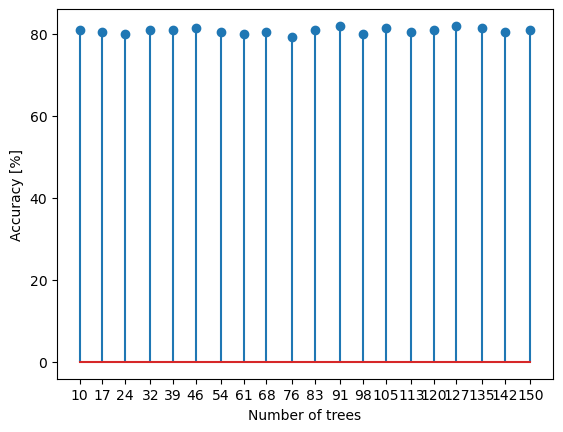

In [7]:
optimal_n_estimators_pt2 = np.linspace(10, 150, 20, dtype = int)
yyy_osa = []
xxx_osa = optimal_n_estimators_pt2

for i in range(0, len(optimal_n_estimators_pt2)):
    clf = RandomForestClassifier(max_depth = optimal_max_depth, max_features = optimal_max_features, n_estimators = optimal_n_estimators_pt2[i])

    clf.fit(X_train, y_train.ravel())

    y_pred = clf.predict(X_test)

    print("Tacnost za broj estimatora", optimal_n_estimators_pt2[i], "je:", metrics.accuracy_score(y_test, y_pred) * 100)
    yyy_osa.append(metrics.accuracy_score(y_test, y_pred) * 100)
    
fig = plt.figure()
ax = fig.add_subplot()
yy = yyy_osa
xt = xxx_osa
ax.stem(xt, yy)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy [%]')
plt.xticks(xxx_osa)